# STRESS DETECTION

Importing the Library modules


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Implementing Fuzzy Logic

In [2]:
attention= ctrl.Antecedent(np.arange(0,101,1),'attention')  #T4-T6
meditation= ctrl.Antecedent(np.arange(0,101,1),'meditation')   #P3-O1
stress= ctrl.Consequent(np.arange(0,101,1),'stress')
# attention

In [3]:
attention['low']=fuzz.trimf(attention.universe,[0,0,35])
attention['medium']=fuzz.trimf(attention.universe,[20,50,80])
attention['high']=fuzz.trimf(attention.universe,[65,100,100])
meditation['low']=fuzz.trimf(meditation.universe,[0,0,35])
meditation['medium']=fuzz.trimf(meditation.universe,[20,50,80])
meditation['high']=fuzz.trimf(meditation.universe,[65,100,100])

In [4]:
stress['low']=fuzz.trimf(stress.universe,[0,0,35])
stress['medium']=fuzz.trimf(stress.universe,[20,50,80])
stress['high']=fuzz.trimf(stress.universe,[65,100,100])

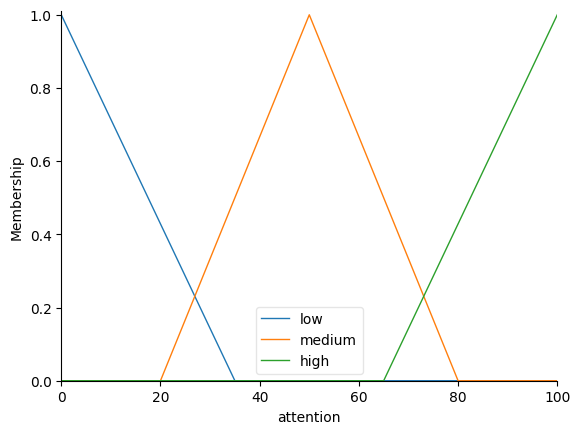

In [5]:
attention.view()

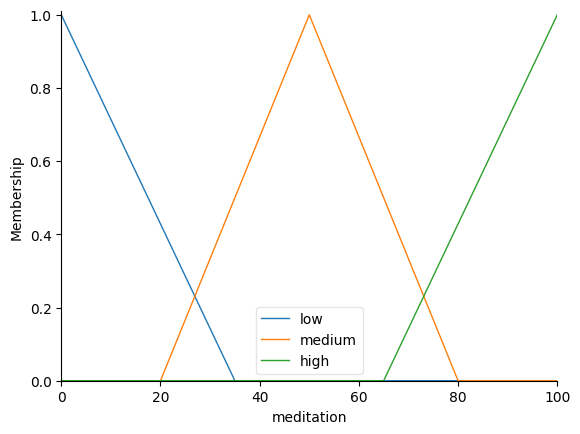

In [6]:
meditation.view()

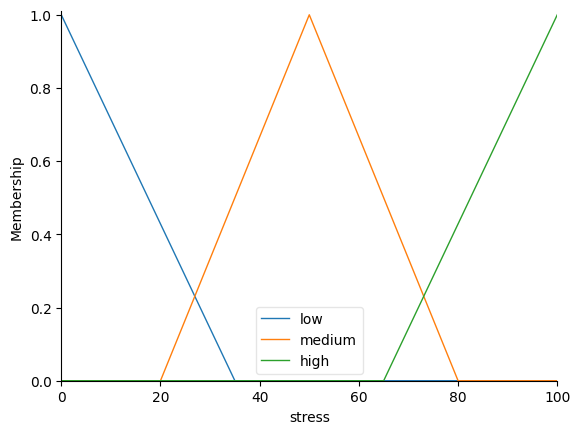

In [7]:
stress.view()

Setting up the rule base

In [8]:
rule1=ctrl.Rule(attention['low'] & meditation['low'], stress['high'])
rule2=ctrl.Rule(attention['low'] & meditation['medium'], stress['high'])
rule3=ctrl.Rule(attention['low'] & meditation['high'], stress['medium'])
rule4=ctrl.Rule(attention['medium'] & meditation['low'], stress['high'])
rule5=ctrl.Rule(attention['medium'] & meditation['medium'], stress['medium'])
rule6=ctrl.Rule(attention['medium'] & meditation['high'],stress['low'])
rule7=ctrl.Rule(attention['high'] & meditation['low'], stress['medium'])
rule8=ctrl.Rule(attention['high'] & meditation['medium'],stress['low'])
rule9=ctrl.Rule(attention['high'] & meditation['high'], stress['low'])

In [9]:
stress_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
stress_simul=ctrl.ControlSystemSimulation(stress_ctrl)

In [10]:
stress_simul.input['attention'] = 77
stress_simul.input['meditation']= 12
stress_simul.compute()

In [11]:
print(stress_simul.output['stress'])

54.394396895433424


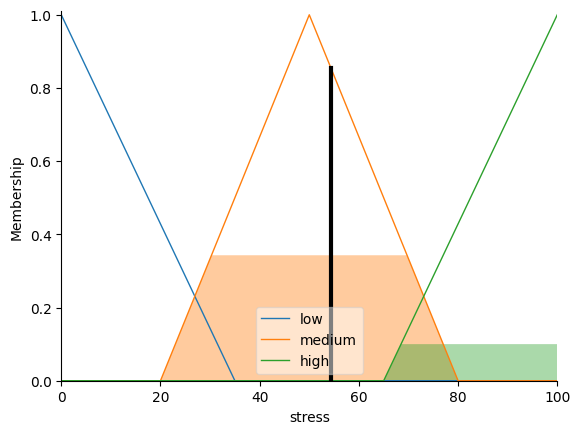

In [12]:
stress.view(sim=stress_simul)

Importing the Dataset

In [13]:
from pandas import read_csv
path=r"C:\Users\ASUS\OneDrive\Desktop\FINAL_DATASET.csv"
data=read_csv(path)

In [14]:
df=pd.DataFrame(data)

In [15]:
l1=df["Meditation"]
l2=df["Attention"]
l1=np.array(l1)
l2=np.array(l2)

Computing the output using the Fuzzy logic

In [16]:
l3=[]
for i,j in zip(l1,l2):
    stress_simul.input['attention'] = j
    stress_simul.input['meditation']= i
    stress_simul.compute()
    a=stress_simul.output['stress']
    l3.append(a)
print(l3)

[50.00000000000001, 48.944288490606816, 50.00000000000002, 50.00000000000001, 50.00000000000001, 50.00000000000001, 48.944288490606816, 47.808524734982335, 48.944288490606816, 47.808524734982335, 50.00000000000001, 47.808524734982335, 48.944288490606816, 50.00000000000001, 48.944288490606816, 43.79231692677071, 48.944288490606816, 50.00000000000001, 49.99999999999999, 50.00000000000001, 50.00000000000001, 45.24796274738065, 50.00000000000001, 48.944288490606816, 49.99999999999999, 50.00000000000003, 49.99999999999999, 50.00000000000001, 48.944288490606816, 47.808524734982335, 50.00000000000001, 50.00000000000001, 47.808524734982335, 50.00000000000001, 48.944288490606816, 50.00000000000002, 50.00000000000001, 47.808524734982335, 47.808524734982335, 47.808524734982335, 50.00000000000001, 50.00000000000003, 50.00000000000001, 50.00000000000001, 50.00000000000001, 48.944288490606816, 49.99999999999999, 50.00000000000003, 50.00000000000001, 50.00000000000003, 50.00000000000002, 49.999999999

Implemeting Linear regression Model 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,max_error


In [18]:
X=df[['Meditation','Attention']]
Y=pd.DataFrame(l3,columns=['Stress'])
# print(Y)

Splitting The Dataset

In [19]:
Train_X,Test_X,Train_Y,Test_Y=train_test_split(X,Y,test_size=0.2,random_state=1)

In [20]:
Train_X.shape,Train_Y.shape,Test_X.shape

((8192, 2), (8192, 1), (2048, 2))

In [21]:
Lin_reg =LinearRegression()
  
Lin_reg.fit(Train_X,Train_Y)

LinearRegression()

Accuracy  And Error Check

In [22]:
def accuracy(predicted, actual):
    n = 0
    for p, a in zip(predicted, actual):
        p=int(p)
        a=int(a)
        if p == a:
            n += 1
    return n/len(predicted) * 100

In [23]:
def predict1(arr):
    arr = np.array(arr)

    global Lin_reg
    result = Lin_reg.predict(arr.reshape(1,-1)).flatten()
    #print(result)
    return result

In [24]:
predicted1 = []
for data in Test_X.values:
    predicted1.append(predict1(data))
predicted1

x1=accuracy(predicted1, Test_Y.values)
print(x1)

10.107421875


In [25]:
mse1=mean_squared_error(Test_Y,predicted1)
print(mse1)
maxe1=max_error(Test_Y,predicted1)
print(maxe1)
vs1=r2_score(Test_Y,predicted1)
print(vs1)

16.27766164636445
30.608558753511048
0.8378825521695685


In [26]:
# lim=[12,77]
# arr = np.array(lim)
# result = Lin_reg.predict(arr.reshape(1,-1)).flatten()
# print(result)

Visualization of Model Result

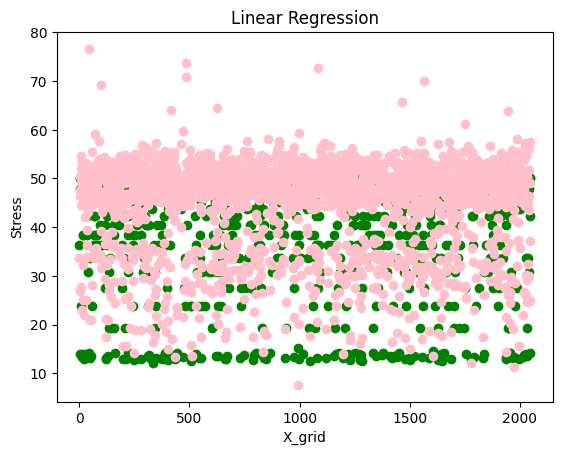

In [27]:
X_grid=np.arange(1,2049,1)
# X_grid=X_grid.reshape((len(X_grid)),1)
plt.scatter(X_grid,Test_Y,color='green')
plt.scatter(X_grid,predicted1,color='pink')
plt.title("Linear Regression")
plt.xlabel("X_grid")
plt.ylabel("Stress")
plt.show()

Evaluation of Model performance

In [28]:
Lin_reg_res=pd.DataFrame(['Linear Regression',x1,mse1,maxe1,vs1]).transpose()
Lin_reg_res.columns=['Model','Accuracy','MSE','MXE','VS']
Lin_reg_res

,Model,Accuracy,MSE,MXE,VS
0,Linear Regression,10.107422,16.277662,30.608559,0.837883


Implementing Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg=LogisticRegression()
Train_x=Train_X.astype('int')
Train_y=Train_Y.astype('int')
Test_x=Test_X.astype('int')
Test_y=Test_Y.astype('int')

In [31]:
log_reg.fit(Train_x,Train_y)


LogisticRegression()

Accuracy Check

In [32]:
def predict2(arr):
    arr = np.array(arr)

    global log_reg
    result = log_reg.predict(arr.reshape(1,-1)).flatten()
    #print(result)
    return result
predicted2 = []
for data in Test_X.values:
    predicted2.append(predict2(data))
predicted2

x2=accuracy(predicted2, Test_Y.values)
print(x2)

52.34375


In [33]:
mse2=mean_squared_error(Test_Y,predicted2)
print(mse2)
maxe2=max_error(Test_Y,predicted2)
print(maxe2)
vs2=r2_score(Test_Y,predicted2)
print(vs2)

134.8581743344635
38.00000000000001
-0.3431206224302865


Visualization of Model Result

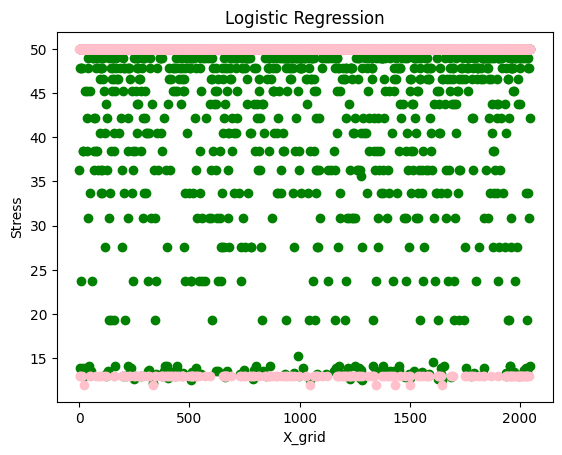

In [34]:
X_grid=np.arange(1,2049,1)
# X_grid=X_grid.reshape((len(X_grid)),1)
plt.scatter(X_grid,Test_Y,color='green')
plt.scatter(X_grid,predicted2,color='pink')
plt.title("Logistic Regression")
plt.xlabel("X_grid")
plt.ylabel("Stress")
plt.show()

Evaluation of Model performance

In [35]:
Log_reg_res=pd.DataFrame(['Logistic Regression',x2,mse2,maxe2,vs2]).transpose()
Log_reg_res.columns=['Model','Accuracy','MSE','MXE','VS']
Log_reg_res

,Model,Accuracy,MSE,MXE,VS
0,Logistic Regression,52.34375,134.858174,38.0,-0.343121


Implementing Random Forest Regression Model

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rf=RandomForestRegressor(random_state=1)


In [38]:
rf.fit(Train_X,Train_Y)

RandomForestRegressor(random_state=1)

Accuracy & Error check

In [39]:
def predict3(arr):
    arr = np.array(arr)

    global rf
    result = rf.predict(arr.reshape(1,-1)).flatten()
    #print(result)
    return result
predicted3 = []
for data in Test_X.values:
    predicted3.append(predict3(data))
predicted3

x3=accuracy(predicted3, Test_Y.values)
print(x3)

91.845703125


In [40]:
mse3=mean_squared_error(Test_Y,predicted3)
print(mse3)
maxe3=max_error(Test_Y,predicted3)
print(maxe3)
vs3=r2_score(Test_Y,predicted3)
print(vs3)

0.0152073653871979
3.951236164026895
0.9998485421728035


Visualization of Model Result

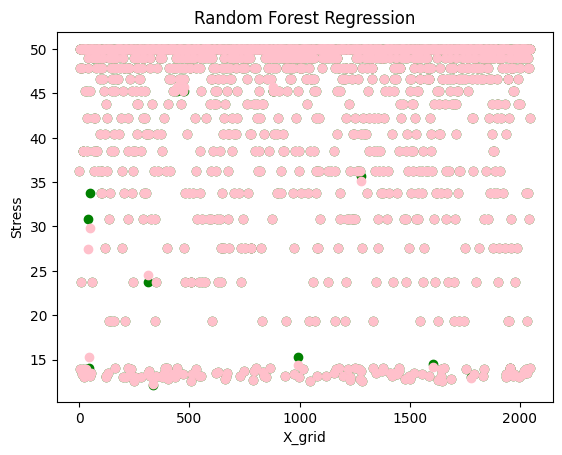

In [41]:
X_grid=np.arange(1,2049,1)
# X_grid=X_grid.reshape((len(X_grid)),1)
plt.scatter(X_grid,Test_Y,color='green')
plt.scatter(X_grid,predicted3,color='pink')
plt.title("Random Forest Regression")
plt.xlabel("X_grid")
plt.ylabel("Stress")
plt.show()

Evaluation of Model performance

In [42]:
rf_res=pd.DataFrame(['Random Forest Regression',x3,mse3,maxe3,vs3]).transpose()
rf_res.columns=['Model','Accuracy','MSE','MXE','VS']
rf_res

,Model,Accuracy,MSE,MXE,VS
0,Random Forest Regression,91.845703,0.015207,3.951236,0.999849


Implementing Decision Tree Regression Model 

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
Dec_reg=DecisionTreeRegressor(random_state=1)

In [45]:
Dec_reg.fit(np.array(Train_X),np.array(Train_Y))

DecisionTreeRegressor(random_state=1)

Accuracy and Error Check

In [46]:
def predict4(arr):
    arr = np.array(arr)

    global Dec_reg
    result = Dec_reg.predict(arr.reshape(1,-1)).flatten()
    #print(result)
    return result
predicted4 = []
for data in Test_X.values:
    predicted4.append(predict4(data))
predicted4

x4=accuracy(predicted4, Test_Y.values)
print(x4)

92.28515625


In [47]:
# lim=[12,77]
# arr = np.array(lim)
# result = Dec_reg.predict(arr.reshape(1,-1)).flatten()
# print(result)

In [48]:
mse4=mean_squared_error(Test_Y,predicted4)
print(mse4)
maxe4=max_error(Test_Y,predicted4)
print(maxe4)
vs4=r2_score(Test_Y,predicted4)
print(vs4)

0.015912796798453498
3.8005446008611017
0.9998415164253408


Visualization of Model Result

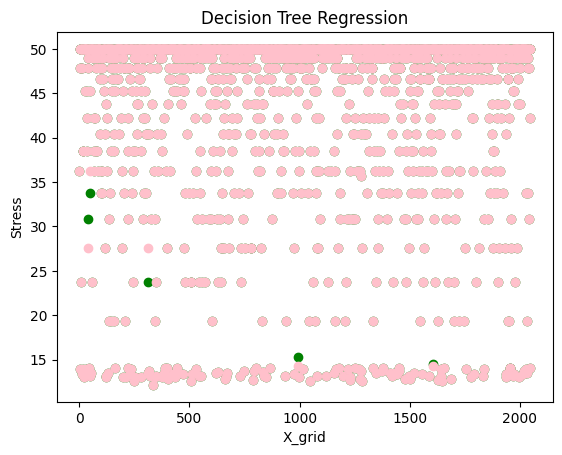

In [49]:
X_grid=np.arange(1,2049,1)
# X_grid=X_grid.reshape((len(X_grid)),1)
plt.scatter(X_grid,Test_Y,color='green')
plt.scatter(X_grid,predicted4,color='pink')
plt.title("Decision Tree Regression")
plt.xlabel("X_grid")
plt.ylabel("Stress")
plt.show()

Evaluation of Model performance

In [50]:
Dec_reg_res=pd.DataFrame(['Decision Tree Regression',x4,mse4,maxe4,vs4]).transpose()
Dec_reg_res.columns=['Model','Accuracy','MSE','MXE','VS']
Dec_reg_res

,Model,Accuracy,MSE,MXE,VS
0,Decision Tree Regression,92.285156,0.015913,3.800545,0.999842


Model Comparison

In [51]:
df_models=pd.concat([Lin_reg_res,Log_reg_res,rf_res,Dec_reg_res],axis=0)
df_models.columns=['Model','Accuracy','MSE','MXE','VS']
df_models.index=[1,2,3,4]
df_models

,Model,Accuracy,MSE,MXE,VS
1,Linear Regression,10.107422,16.277662,30.608559,0.837883
2,Logistic Regression,52.34375,134.858174,38.0,-0.343121
3,Random Forest Regression,91.845703,0.015207,3.951236,0.999849
4,Decision Tree Regression,92.285156,0.015913,3.800545,0.999842


In [52]:
import pickle

In [53]:
with open('model_pickle','wb') as f:
    pickle.dump(Dec_reg,f)